In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import nltk
import os
import tweepy
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv

#Download Vader Lexicon
nltk.download('vader_lexicon')
load_dotenv()  # take environment variables from .env.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kishan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Authentication
consumerKey = os.getenv("CONSUMERKEY")
consumerSecret = os.getenv("CONSUMERSECRET")
accessToken = os.getenv("ACCESSTOKEN")
accessTokenSecret = os.getenv("ACCESSTOKENSECRET")
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag: ")
noOfTweet = int(input ("Enter the number of tweets to fetch: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
   negative_list.append(tweet.text)
   negative += 1
 elif pos > neg:
   positive_list.append(tweet.text)
   positive += 1
 
 elif pos == neg:
   neutral_list.append(tweet.text)
   neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag: mobikwik
Enter the number of tweets to fetch: 250


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  250
positive number:  61
negative number:  61
neutral number:  128


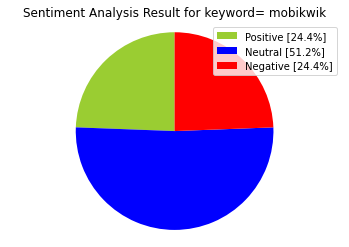

In [6]:
#Creating PieCart
labels = ["Positive ["+str(positive)+"%]" , "Neutral ["+str(neutral)+"%]","Negative ["+str(negative)+"%]"]
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis("equal")
plt.show()

In [7]:
#Drop duplicates
tweet_list.drop_duplicates(inplace = True)
tweet_list

,0
0,It's easier for companies to silcence a cyber ...
1,RT @svaradarajan: Must read piece by Srinivas ...
2,How not to secure the digital wallet | The Ind...
3,@MobiKwik Why have you not given option for us...
4,RT @amitpsk: ओह!\nइतना भारी जुर्माना!!\n\nलगता...
...,...
244,@krishanuIND @dcchoudhary197 @MobiKwik @rajaha...
246,It's been 3 months &amp; @MobiKwik @MobiKwikSW...
247,RT @medianama: #Recap Hacker Pulls Database Fr...
248,"@mobikwik is a cheater brand, they don't show ..."


In [8]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head()

,0,text
0,It's easier for companies to silcence a cyber ...,it s easier for companies to silcence a cyber ...
1,RT @svaradarajan: Must read piece by Srinivas ...,must read piece by srinivas kodali mobi...
2,How not to secure the digital wallet | The Ind...,how not to secure the digital wallet the ind...
3,@MobiKwik Why have you not given option for us...,why have you not given option for users to d...
4,RT @amitpsk: ओह!\nइतना भारी जुर्माना!!\n\nलगता...,fy19 20 ...


In [9]:

#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,It's easier for companies to silcence a cyber ...,it s easier for companies to silcence a cyber ...,0.000000,0.000000,positive,0.000,0.679,0.321,0.6369
1,RT @svaradarajan: Must read piece by Srinivas ...,must read piece by srinivas kodali mobi...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,How not to secure the digital wallet | The Ind...,how not to secure the digital wallet the ind...,0.200000,0.300000,negative,0.184,0.816,0.000,-0.2584
3,@MobiKwik Why have you not given option for us...,why have you not given option for users to d...,0.400000,0.600000,positive,0.000,0.882,0.118,0.3400
4,RT @amitpsk: ओह!\nइतना भारी जुर्माना!!\n\nलगता...,fy19 20 ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @TechCrunch: New: TechCrunch has learned th...,new techcrunch has learned that mobikwik wh...,0.136364,0.454545,positive,0.000,0.794,0.206,0.5267
7,Our data is getting leaked and I raised two ti...,our data is getting leaked and i raised two ti...,0.000000,0.000000,negative,0.113,0.887,0.000,-0.3182
8,@MobiKwik @MobiKwikSWAT Dear sir you che...,dear sir you cheat and fraud with me,0.000000,0.000000,negative,0.472,0.347,0.181,-0.6369
9,@yatendrakartik Hi Yatendra! Please be informe...,hi yatendra please be informed that the men...,0.000000,1.000000,positive,0.000,0.874,0.126,0.3182
11,RT @thewire_in: India’s latest privacy controv...,india s latest privacy controversy is growing...,0.138889,0.494444,positive,0.000,0.918,0.082,0.1779


In [10]:

#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [11]:

#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [12]:

#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,64,35.96
positive,59,33.15
negative,55,30.90


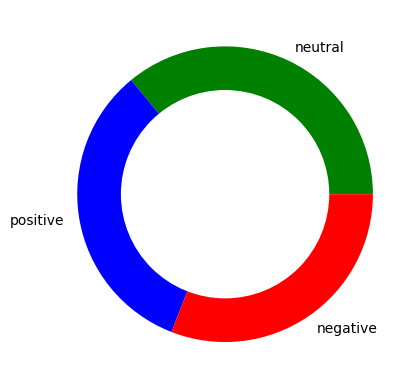

In [13]:

# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:

#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)